<a href="https://colab.research.google.com/github/manasakoyyana/DAY1-618-/blob/main/2311cs020618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [5]:
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
print(file_name)

Saving Toyota.xlsx to Toyota (1).xlsx
Toyota (1).xlsx


In [7]:
df=pd.read_excel(file_name)
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df.corr(numeric_only=True)

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.110880,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.317251,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.157875,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.040047,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.166161,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333913,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.110880,0.317251,-0.157875,-0.040047,0.166161,-0.333913,1.000000,0.059263,0.012967,0.036326,...,0.250942,0.266459,0.048975,0.020697,0.210234,-0.006064,0.011320,0.206492,0.019619,0.067843
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.059263,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.012967,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.036326,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [9]:
model = smf.ols('Price ~ Age_08_04 + KM + HP + Doors + Cylinders + Gears + Weight', data=df).fit()

model.params

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1491.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:55:12   Log-Likelihood:                -12363.
No. Observations:                1434   AIC:                         2.474e+04
Df Residuals:                    1427   BIC:                         2.478e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -406.5800     77.228     -5.265      0.000    -558.073    -255.087
Age_08_04   -122.2242      2.616    -46.725      0.000    -127.355    -117.093
KM            -0.0200      0.001    -16.526      0.000      -0.022      -0.018
HP            28.4546      2.615     10.881      0.000      23.325      33.584
Doors         -5.4393     40.073     -0.136      0.892     -84.048      73.169
Cylinders  -1626.3198    308.913     -5.265      0.000   -2232.293   -1020.347
Gears        626.0724    197.385      3.172      0.002     238.876    1013.269
Weight        18.4944      0.832     22.223      0.000      16.862      20.127
==============================================================================
Omnibus:                      195.355   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.934
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       8.013   Cond. No.                     5.54e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.86e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting numerical columns for VIF calculation
X = df[['Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears', 'Weight']]
X['Intercept'] = 1  # Add intercept for VIF calculation

<ipython-input-10-7ad7092ee3f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1  # Add intercept for VIF calculation


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting numerical columns for VIF calculation
X = df[['Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders', 'Gears', 'Weight']]
X['Intercept'] = 1  # Add intercept for VIF calculation

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data  # Display the VIF data

<ipython-input-11-379e2d3d67f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1  # Add intercept for VIF calculation


MissingDataError: exog contains inf or nans

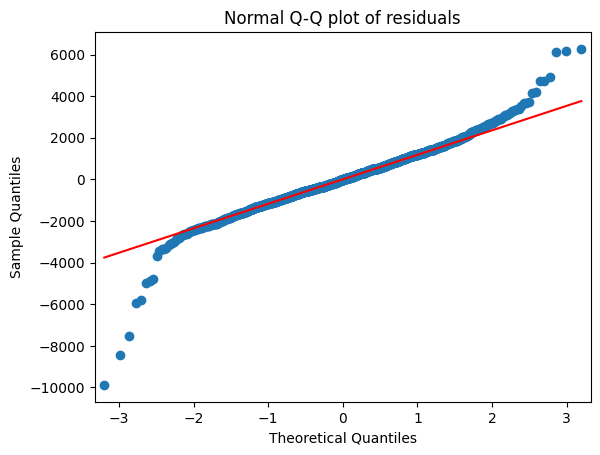

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


# Q-Q plot for residuals
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


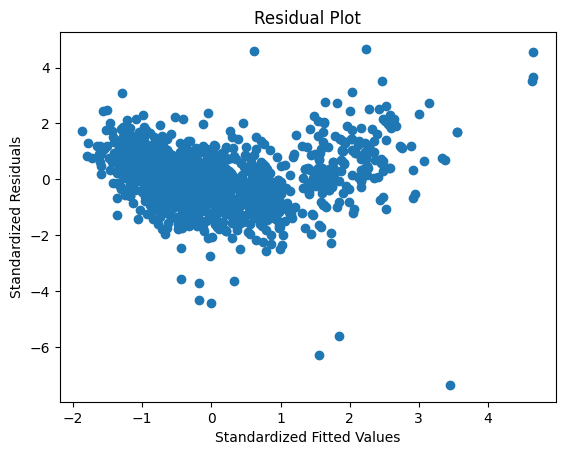

In [13]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

ValueError: could not broadcast input array from shape (1434,) into shape (1436,)

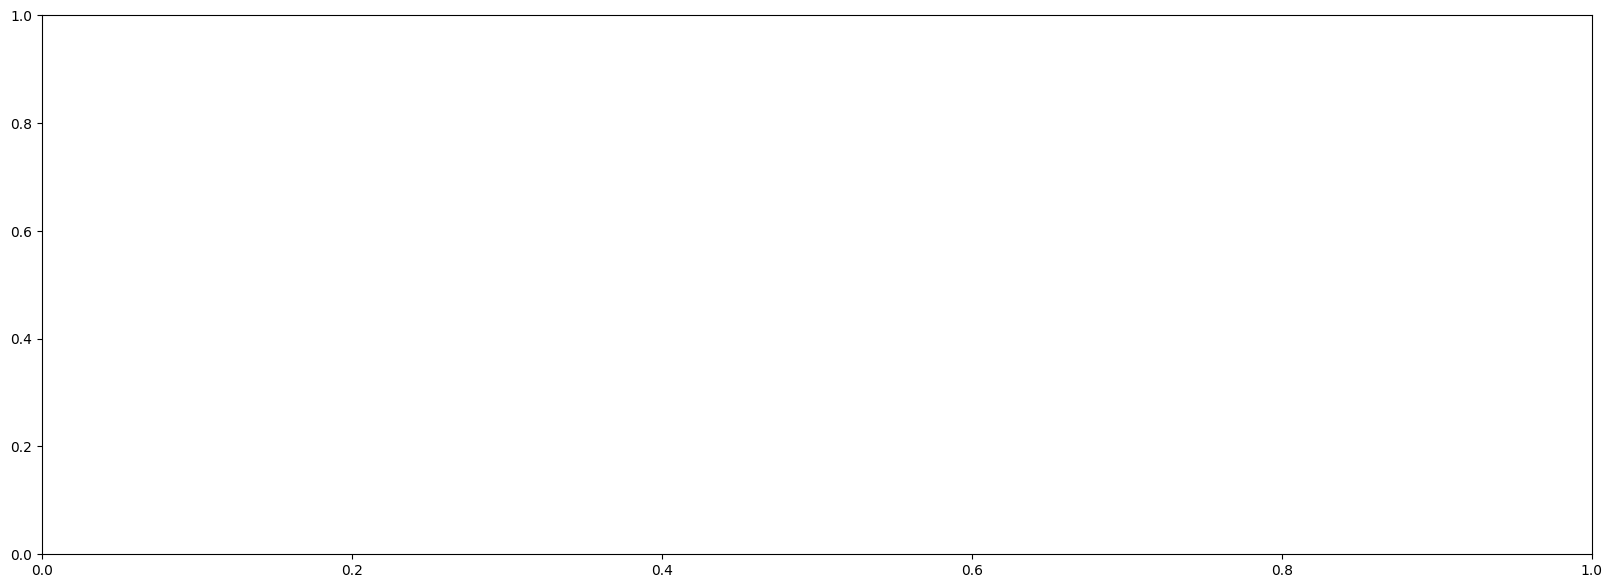

In [17]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate Cook's Distance
influence = OLSInfluence(model)
c = influence.cooks_distance[0]  # Get Cook's distance values

# Plot Cook's Distance
plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show()

In [15]:
threshold = 4 / len(df)

# Identify influential points based on Cook's distance
influential_points = np.where(c > threshold)[0] #added this line to define influential_points

# Drop influential points and rebuild model
df_cleaned = df.drop(df.index[influential_points])
model_refit = smf.ols('Price ~ Age_08_04 + KM + HP + Doors + Cylinders + Gears + Weight', data=df_cleaned).fit()

model_refit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1256.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:56:45   Log-Likelihood:                -11836.
No. Observations:                1377   AIC:                         2.369e+04
Df Residuals:                    1370   BIC:                         2.372e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -188.8821     81.391     -2.321      0.020    -348.547     -29.217
Age_08_04   -124.5412      2.654    -46.921      0.000    -129.748    -119.334
KM            -0.0183      0.001    -14.844      0.000      -0.021      -0.016
HP            27.3783      2.691     10.173      0.000      22.099      32.658
Doors         21.7160     40.174      0.541      0.589     -57.094     100.526
Cylinders   -755.5285    325.565     -2.321      0.020   -1394.188    -116.869
Gears        531.0649    198.713      2.673      0.008     141.251     920.879
Weight        15.4757      0.904     17.112      0.000      13.702      17.250
==============================================================================
Omnibus:                      135.215   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              819.245
Skew:                          -0.207   Prob(JB):                    1.27e-178
Kurtosis:                       6.756   Cond. No.                     6.22e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
(model_refit.rsquared)

0.8461350351365727